In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
df.shape

(271116, 15)

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = df.merge(region,on='NOC',how='left')

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
df.shape

(271116, 17)

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [10]:
df.duplicated().sum()

1385

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
#top countries
top_countries = df.Team.value_counts().sort_values(ascending=False).head(10)

In [14]:
top_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

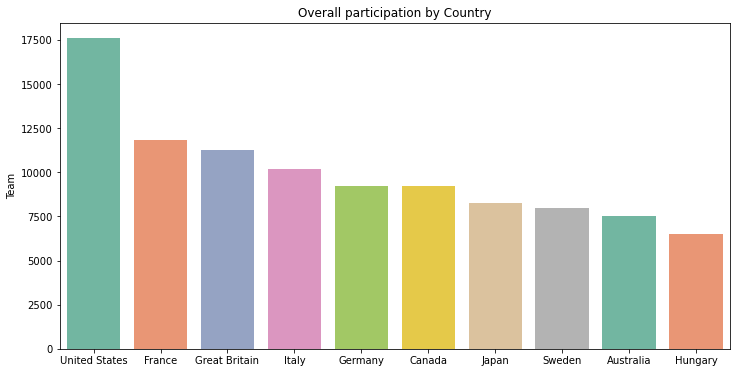

In [15]:
plt.figure(figsize=(12,6))
plt.title('Overall participation by Country')
sns.barplot(x=top_countries.index,y=top_countries,palette = 'Set2');

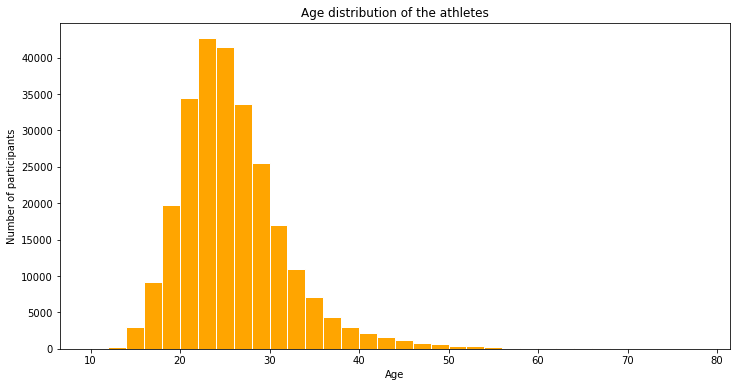

In [16]:
plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df.Age, bins = np.arange(10,80,2),color='orange',edgecolor = 'white');

In [17]:
winter_sports = df[df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [18]:
Summer_sports = df[df.Season == 'Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [19]:
gender_count = df.Sex.value_counts()
gender_count

M    195353
F     74378
Name: Sex, dtype: int64

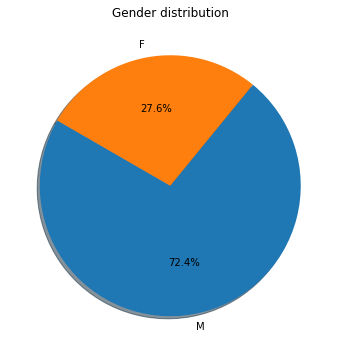

In [20]:
plt.figure(figsize=(12,6))
plt.title('Gender distribution')
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',startangle=150,shadow=True);

#autopct='%1.1f%%' use to display percentage using the python string formating

In [21]:
df.Medal.value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [22]:
female_participants = df[(df.Sex=='F') & (df.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [23]:
womenOlympics = df[(df.Sex == 'F') &  (df.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

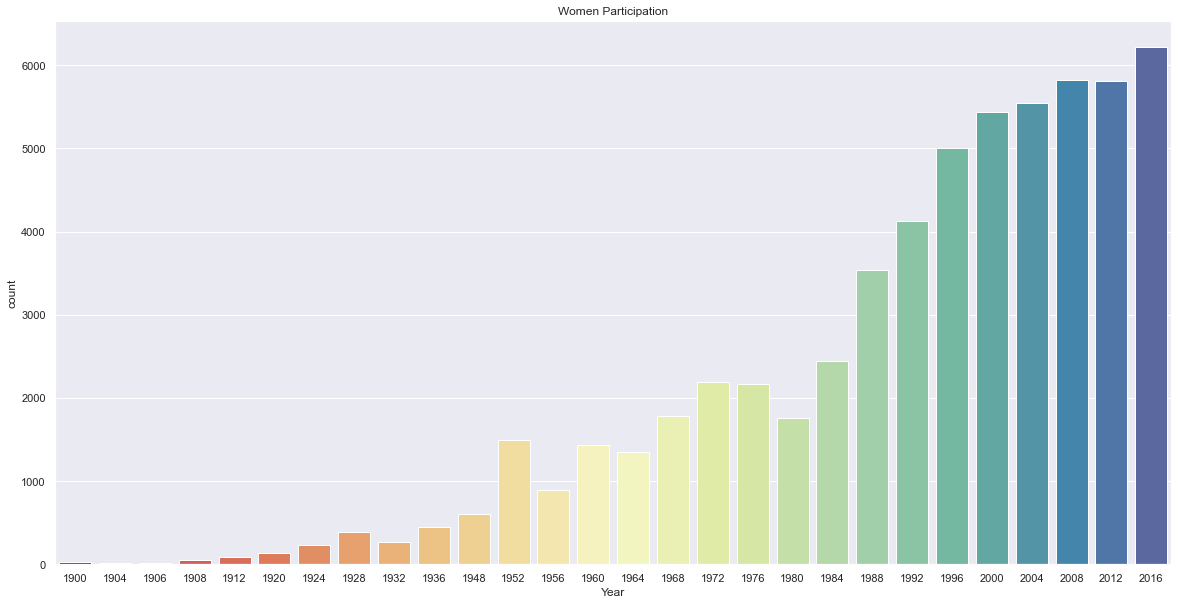

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data = womenOlympics, palette = "Spectral")
plt.title("Women Participation")        

Text(0.5, 1.0, 'Plot of female Athelets over time')

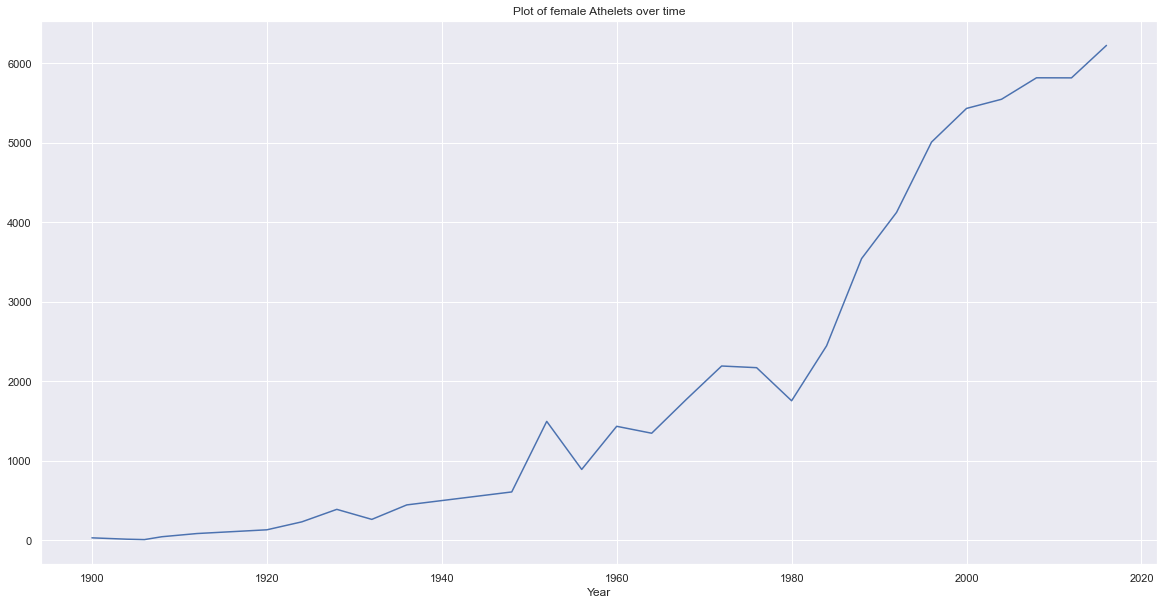

In [25]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of female Athelets over time')

In [26]:
goldmedals = df[(df.Medal=='Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [27]:
goldmedals = goldmedals[np.isfinite(goldmedals['Age'])]

In [28]:
goldmedals['ID'][goldmedals['Age']>60].count()

6

In [29]:
sporting_event = goldmedals['Sport'][goldmedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

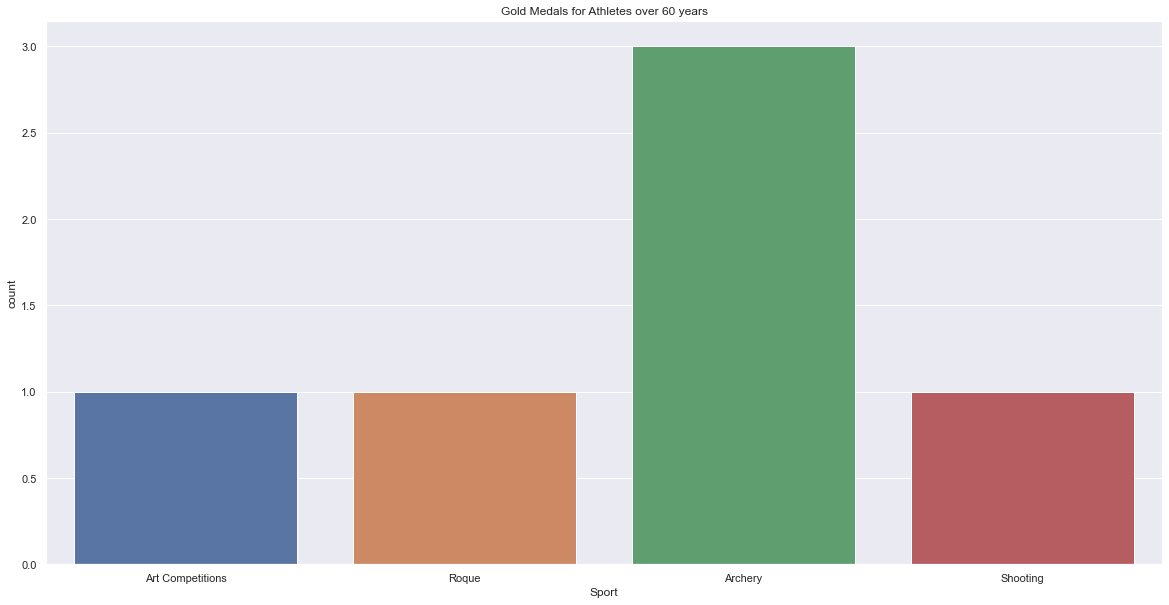

In [30]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Athletes over 60 years')

In [31]:
goldmedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,656
4,Italy,567


Text(0.5, 1.0, 'Gold Medals per Country')

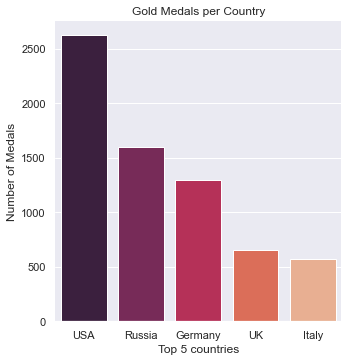

In [32]:
totalGoldMedals = goldmedals.region.value_counts().reset_index(name = 'Medal').head(5)
g = sns.catplot(x='index',y='Medal',data=totalGoldMedals,height=5 ,kind='bar',palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('Number of Medals')
plt.title("Gold Medals per Country")

In [33]:
max_year = df.Year.max()
print(max_year)


team_names = df[(df.Year == max_year) & (df.Medal == "Gold")].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

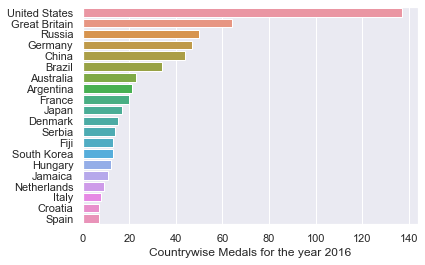

In [34]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Countrywise Medals for the year 2016');

In [35]:
not_null=df[(df["Height"].notnull()) & (df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

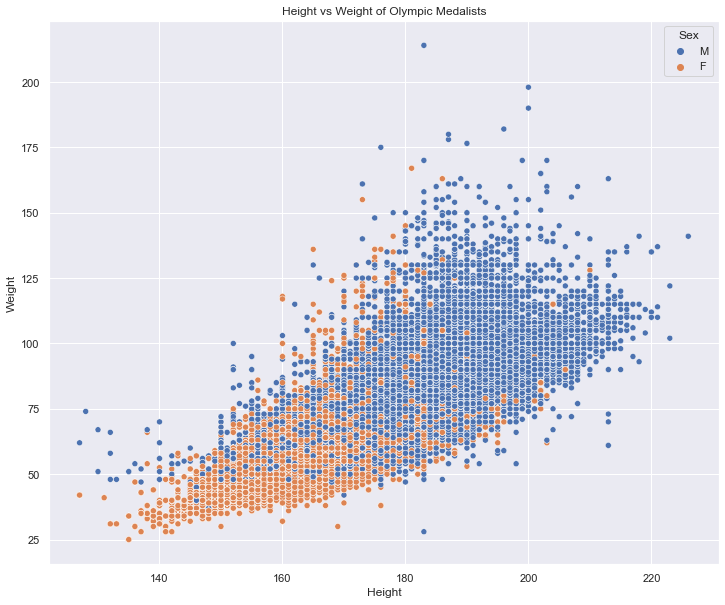

In [36]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x='Height',y='Weight',data=not_null, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')

In [39]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [40]:
Female_gold_medalists = df[(df["Medal"] == "Gold") & (df["Sex"] == "F")][["Sport", "Medal"]]
Female_gold_medalists = Female_gold_medalists.value_counts(["Sport"]).reset_index(name = "Female_gold_medalists")[:5]
print(f"\nFEMALE GOLD MEDALISTS IN SUMMER OLYMPICS:\n")
Female_gold_medalists


FEMALE GOLD MEDALISTS IN SUMMER OLYMPICS:



,Sport,Female_gold_medalists
0,Swimming,493
1,Athletics,428
2,Rowing,238
3,Gymnastics,234
4,Hockey,158


In [42]:
Male_gold_medalists = df[(df["Medal"] == "Gold") & (df["Sex"] == "M")][["Sport", "Medal"]]
Male_gold_medalists = Male_gold_medalists.value_counts(["Sport"]).reset_index(name = "Male_gold_medalists")[:5]
print(f"\nMALE GOLD MEDALISTS IN SUMMER OLYMPICS:\n")
Male_gold_medalists


MALE GOLD MEDALISTS IN SUMMER OLYMPICS:



,Sport,Male_gold_medalists
0,Athletics,911
1,Rowing,740
2,Swimming,606
3,Gymnastics,557
4,Fencing,475
